# **Importing Packages**

---

In [293]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

# **Importing Project Data**

---

Importing Avaiation_Data.csv:

In [294]:
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
# Run Read below for google colab:
# df = pd.read_csv('Aviation_Data.csv', low_memory=False)

Identify **column names** and how many cells are **empty**:

In [295]:
df.isna().sum().sort_values(ascending=False)

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40099
Airport.Name              37558
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8536
Report.Status              7840
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2776
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

# **General Data Cleaning**

---

Adjusts all columns titles to lower-case + replaces the " . " with " _ ":

In [296]:
df = df.rename(columns={c: c.lower().replace('.', '_') for c in df.columns})

Selecting all of the columns needed and using the same Data Frame name 'df':

In [297]:
df = df[['location','investigation_type','event_date','country','injury_severity','aircraft_category','make', 'model','number_of_engines', 'engine_type', 'total_fatal_injuries', 'total_uninjured', 'total_serious_injuries', 'total_minor_injuries', 'latitude','longitude', 'amateur_built']]



Clean country to make lowercase + Refining to **'United States'**:

In [298]:
df['country'] = df['country'].str.lower()

In [299]:
df = df[df['country'] == 'united states']

Cleaning '**location**' + adding '**state**' column:

In [300]:
df['location'] = df['location'].str.lower()
df['state'] = df['location'].str[-2:]
df.dropna(subset=['location'], inplace=True)

show 'states' list:

In [301]:
list(df['state'].value_counts().items())

[('ca', 8857),
 ('tx', 5913),
 ('fl', 5825),
 ('ak', 5672),
 ('az', 2834),
 ('co', 2726),
 ('wa', 2613),
 ('il', 2060),
 ('mi', 2030),
 ('ga', 2023),
 ('ny', 1915),
 ('oh', 1823),
 ('pa', 1790),
 ('or', 1772),
 ('nc', 1661),
 ('mo', 1565),
 ('wi', 1560),
 ('ar', 1519),
 ('mn', 1456),
 ('id', 1436),
 ('nm', 1358),
 ('ut', 1336),
 ('in', 1320),
 ('va', 1275),
 ('ok', 1240),
 ('nv', 1236),
 ('la', 1216),
 ('nj', 1170),
 ('al', 1153),
 ('tn', 1108),
 ('ks', 1104),
 ('mt', 1050),
 ('sc', 974),
 ('ma', 969),
 ('ia', 819),
 ('md', 815),
 ('ms', 813),
 ('wy', 739),
 ('ne', 725),
 ('ky', 650),
 ('nd', 561),
 ('me', 505),
 ('ct', 502),
 ('hi', 499),
 ('sd', 446),
 ('wv', 394),
 ('nh', 368),
 ('vt', 241),
 ('ri', 158),
 ('de', 114),
 ('pr', 114),
 ('gm', 44),
 ('dc', 42),
 ('of', 17),
 ('ao', 17),
 ('n,', 15),
 ('po', 14),
 ('o,', 12),
 ('a,', 8),
 ('gu', 8),
 ('vi', 6),
 ('g,', 5),
 ('x,', 3),
 (',', 3),
 ('9,', 3),
 ('un', 3),
 ('e,', 3),
 ('d,', 2),
 ('c,', 1),
 ('i,', 1),
 ('h,', 1),
 ('y,', 

(2) **Investigation_Type**:

In [302]:
print(f"Accidents: {df['investigation_type'].value_counts()['Accident']}")
print(f"Incidents: {df['investigation_type'].value_counts()['Incident']}")
# What is the difference????

Accidents: 79895
Incidents: 2342


Filtering '**Event_date**' to 2001-11-19 and greater: 

In [303]:
df = df[df['event_date'] >= '2001-11-19']

Examining '**injury_severity**' data: 

In [304]:
df['injury_severity'].value_counts()

# Not sure what minor/incident/'49' means...

Non-Fatal    25564
Fatal         3556
Fatal(1)      1096
Fatal(2)       629
Incident       334
Minor          203
Fatal(3)       191
Serious        153
Fatal(4)        99
Fatal(5)        39
Fatal(6)        10
Fatal(7)         3
Fatal(8)         2
Fatal(10)        2
Fatal(49)        1
Fatal(20)        1
Fatal(13)        1
Fatal(21)        1
Name: injury_severity, dtype: int64

filling in missing values for:
- total_fatal_injuries
- total_serious_injuries
- total_minor_injuries


In [305]:
df['total_fatal_injuries'] = df['total_fatal_injuries'].fillna(0)
df['total_serious_injuries'] = df['total_serious_injuries'].fillna(0)
df['total_minor_injuries'] = df['total_minor_injuries'].fillna(0)


filling 'injury_severity' with data that corresponds with 'total_fatal_injuries' value:
- If total_fatal_injuries == 0, make injury_severity == Non-Fatal

In [306]:
df.loc[(df['total_fatal_injuries'] == 0) & (df['injury_severity'].isna()), 'injury_severity'] = 'Non-Fatal'
df.loc[(df['total_fatal_injuries'] != 0) & (df['injury_severity'].isna()), 'injury_severity'] = 'Fatal'

Filling in missing values for 'total_uninjured':

In [332]:
df['total_uninjured'] = df['total_uninjured'].fillna(0)

Filling missing Longitude and Latitude with 'unknown':


In [338]:
df['longitude'] = df['longitude'].fillna('unknown')
df['latitude'] = df['latitude'].fillna('unknown')

Examining '**aircraft_category**' data + refine to **airplanes** only:

In [307]:
print('1.')
print(f"** {df['aircraft_category'].isna().sum()} empty cells in this column") # 7625 empy cells
print()
df = df[df['aircraft_category'] == 'Airplane']
print()
print('2.')
print(df['aircraft_category'].value_counts())


1.
** 7618 empty cells in this column


2.
Airplane    20870
Name: aircraft_category, dtype: int64


Examining '**number_of_engines**' data: 

In [308]:
print('1)')
print(f"** {df['number_of_engines'].isna().sum()} empty cells in this column") # 1053 empy cells
print()
print()
print()
print('2)')
print(df['number_of_engines'].value_counts())

1)
** 619 empty cells in this column



2)
1.0    17836
2.0     2352
4.0       38
3.0       20
0.0        3
6.0        1
8.0        1
Name: number_of_engines, dtype: int64


Cleaning '**make' & 'model**':

In [309]:
## make
df['make'] = df['make'].str.lower()
df['make'].value_counts(ascending=False) 


cessna               6349
piper                3580
beech                1253
boeing                397
mooney                336
                     ... 
hatz                    1
lanham                  1
rans s-12               1
viguie g/viguie m       1
page russell l          1
Name: make, Length: 3282, dtype: int64

In [310]:
# dropping 13 missing items:
df.dropna(subset=['make'], inplace=True)

df['make'].isna().sum()

0

In [311]:
## model 
df['model'] = df['model'].str.lower()
df['model'].value_counts(ascending=False)


172                674
152                290
172s               273
182                243
172n               237
                  ... 
dornier d027-b2      1
ironsides            1
loehle 5151          1
microlite            1
s 1c                 1
Name: model, Length: 4151, dtype: int64

In [312]:
# dropping 15 missing items:
df.dropna(subset=['model'], inplace=True)

df['model'].isna().sum()

0

Visualizing the top 30 Makes & Models:

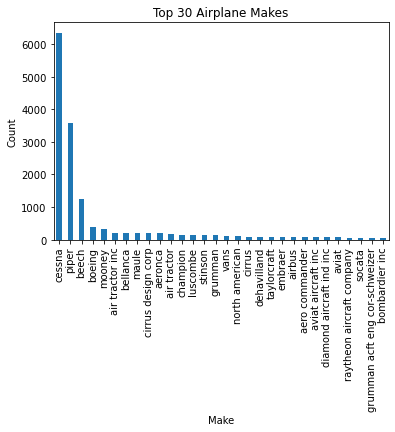

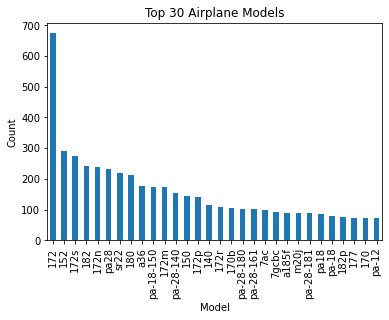

In [313]:
df['make'].value_counts().head(30).plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Top 30 Airplane Makes')
plt.show()  # This will display the plot

df['model'].value_counts().head(30).plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 30 Airplane Models')
plt.show()  # This will display the plot


Visualizing the number of accidents and Incidents:

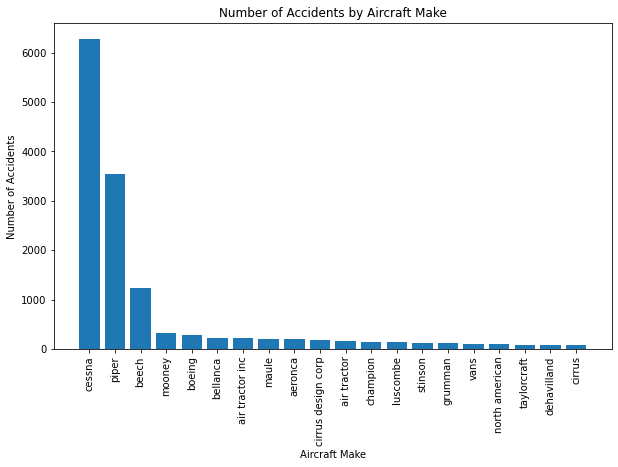

In [314]:
accidents_df = df[df['investigation_type'] == 'Accident']

# Get the counts of each 'make'
counts = accidents_df['make'].value_counts().head(20)

# Get the categories (makes) and their corresponding accident counts
categories = counts.index
accidents = counts.values

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(categories, accidents)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Aircraft Make')
plt.show()



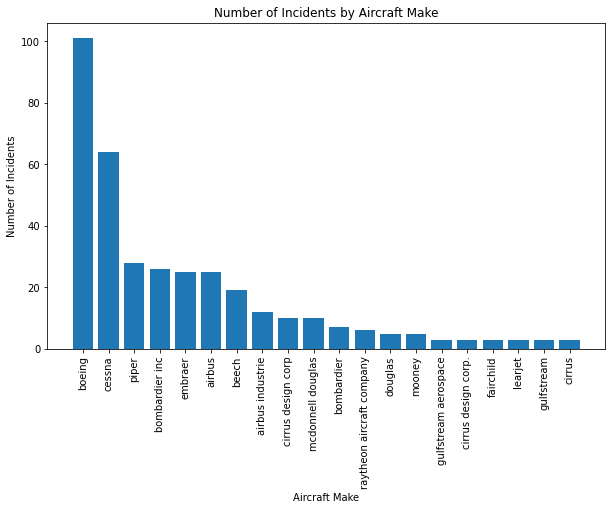

In [315]:
# Filter rows that have 'Incident' in the 'investigation_type' column
incidents_df = df[df['investigation_type'] == 'Incident']

# Get the counts of each 'make'
counts = incidents_df['make'].value_counts().head(20)

# Get the categories (makes) and their corresponding incident counts
categories = counts.index
incidents = counts.values

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(categories, incidents)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Aircraft Make')
plt.show()

Cleaning format of values + Filter Out '**amateur_built**' values:

In [316]:
df['amateur_built'] = df['amateur_built'].str.lower()
df = df[df['amateur_built'] == 'no']

In [317]:
df.isna().sum().sort_values(ascending=False)

engine_type               1647
number_of_engines          482
total_uninjured            466
longitude                   62
latitude                    55
make                         0
investigation_type           0
event_date                   0
country                      0
injury_severity              0
aircraft_category            0
state                        0
model                        0
amateur_built                0
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
location                     0
dtype: int64

# **Refining to Commercial Planes Only**

---

Identifying which **engine_type** is used for commercial planes and filtering accordingly:

Only using **Reciprocating** and **Turbo Fan**:

In [318]:
## Research:
# Reciprocating = Yes; some are / aren't
# Turbo Prop = No
# Turbo Fan = Yes; some are / aren't
# Delete: Unknown, Turbo Shaft, Electric, UNK


df = df[(df['engine_type'] == 'Reciprocating') | (df['engine_type'] == 'Turbo Fan')]
df['engine_type'].value_counts()


Reciprocating    14453
Turbo Fan          636
Name: engine_type, dtype: int64

Filtering to planes with 2 or more engines:

In [319]:
df = df[df['number_of_engines'] >= 2]
df['number_of_engines'].value_counts()

2.0    1634
4.0      24
3.0      16
Name: number_of_engines, dtype: int64

Below is a list of the top commercial airplane manufacturers named **commercial_manufacturers**:

In [320]:
commercial_manufacturers = [
    "airbus",
    "boeing",
    "embraer",
    "comac",
    "atr",
    "mcdonnell douglas",
    "mcdonnell",
    "tupolev",
    "ilyushin",
]




This is testing the above variable to see how many of each manufaturer is within our dataframe:


In [321]:
mask = df['make'].isin(commercial_manufacturers)
filtered_df = df[mask]
filtered_df['make'].value_counts()

boeing               183
airbus                55
embraer               43
mcdonnell douglas     25
Name: make, dtype: int64

---

The most common commercial plane manufacturers are:
- boeing
- airbus
- embraer
- mcdonnell douglas (now owned by boeing)
- bombardier 

---

filtering dataframe to commercial plane manufacturers only:


In [322]:
df = df[df['make'].isin(commercial_manufacturers)]


confirming all of the 'models' are indeed commercial planes:


In [323]:
not_commercial = ['a75', 'a75n1', 'b75n1', 'a75n1(pt17)', 'a75n1 (pt17)', 'b75', 'e75', 'b17', 'emb-500', 'pt 17', 'n2s-3', 'a 75n1', 'a75n-1', 'd75n1', 'b-17g']

# the ~ in front of df is a negation operator to 
# do the opposite of the following action:
df = df[~df['model'].isin(not_commercial)]

df['model'].value_counts()

737         21
737 7h4     15
737-7h4     12
757         11
a320        10
            ..
a319 114     1
e175         1
emb170       1
a380         1
erj190       1
Name: model, Length: 145, dtype: int64

## Check to make sure there are no missing values:

In [340]:
df.isna().sum().sort_values(ascending=False)

state                     0
amateur_built             0
investigation_type        0
event_date                0
country                   0
injury_severity           0
aircraft_category         0
make                      0
model                     0
number_of_engines         0
engine_type               0
total_fatal_injuries      0
total_uninjured           0
total_serious_injuries    0
total_minor_injuries      0
latitude                  0
longitude                 0
location                  0
dtype: int64

# **Determining Safety for Commercial planes**

---

Identifying which **states** have the highest amount of Accidents/Incidents:


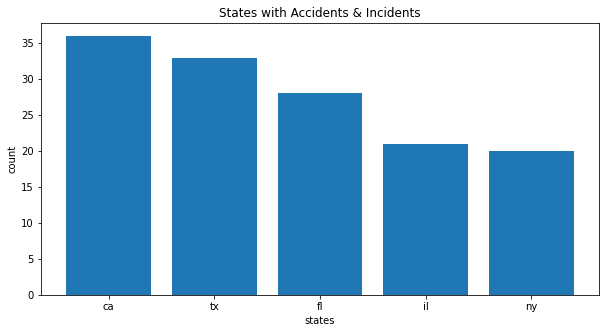

In [382]:
counts = df['state'].value_counts().sort_values(ascending=False).head()

# Extract index and values
x = counts.index
y = counts.values

# Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, y)
plt.xlabel('states')
plt.ylabel('count')
plt.title('States with Accidents & Incidents')

plt.show()

**Top 5 States** & whether there was an **accident** VS **incident**:

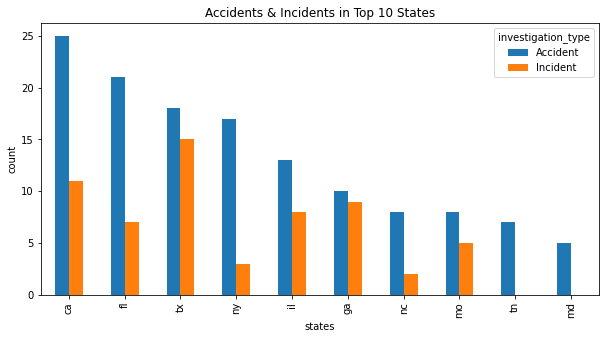

In [387]:
grouped_1 = df.groupby(['state', 'investigation_type']).size().unstack().sort_values(by='Accident', ascending=False).head(10)

# Plot
grouped_1.plot(kind='bar', stacked=False, figsize=(10,5))
plt.xlabel('states')
plt.ylabel('count')
plt.title('Accidents & Incidents in Top 10 States')

plt.show()

Determining which **models** have had the most accident/incidents and if they were fatal/non-fatal:

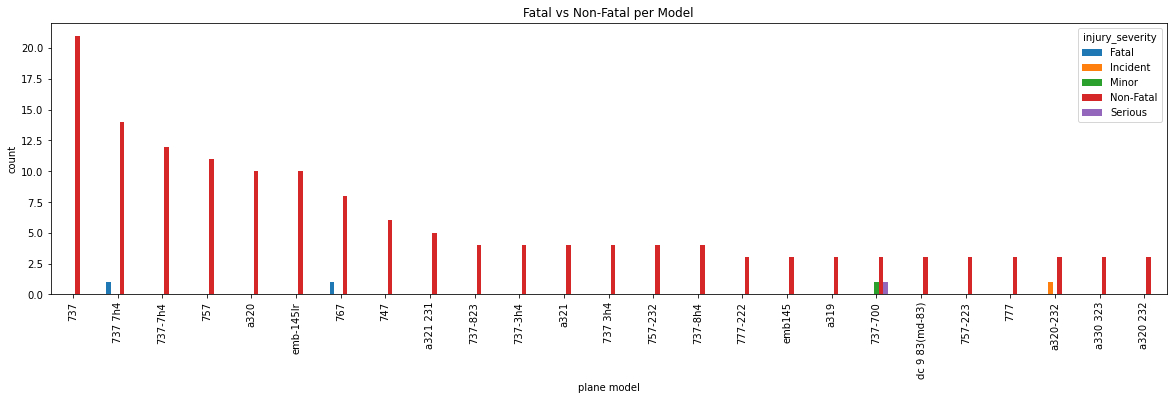

In [394]:
grouped_2 = df.groupby(['model', 'injury_severity']).size().unstack().sort_values(by='Non-Fatal', ascending=False).head(25)

# plot
grouped_2.plot(kind='bar', stacked=False, figsize=(20,5))
plt.xlabel('plane model')
plt.ylabel('count')
plt.title('Fatal vs Non-Fatal per Model')

plt.show()

Determining which **makes** have had the most accident/incidents and if they were fatal/non-fatal:

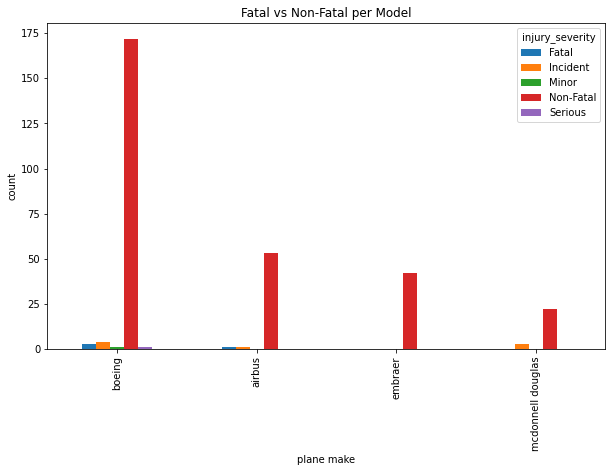

In [397]:
grouped_3 = df.groupby(['make', 'injury_severity']).size().unstack().sort_values(by='Non-Fatal', ascending=False).head(25)

# plot
grouped_3.plot(kind='bar', stacked=False, figsize=(10,6))
plt.xlabel('plane make')
plt.ylabel('count')
plt.title('Fatal vs Non-Fatal per Model')

plt.show()